In [774]:
import requests
import pandas as pd

# URLs for the JSON data
historical_data_url = "https://api.jsonserve.com/XgAgFJ"
current_data_url_1 = "https://www.jsonkeeper.com/b/LLQT"
current_data_url_2 = "https://api.jsonserve.com/rJvd7g"

# Fetch data function
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to fetch data from {url}, Status Code: {response.status_code}")

# Fetch the data
historical_data = fetch_data(historical_data_url)
current_data_1 = fetch_data(current_data_url_1)
current_data_2 = fetch_data(current_data_url_2)

# Convert to pandas DataFrame
historical_df = pd.json_normalize(historical_data)
current_df_1 = pd.json_normalize(current_data_1)
current_df_2 = pd.json_normalize(current_data_2)




In [780]:
# Add or rename columns for alignment if needed
if 'topic' not in current_df_1.columns:
    current_df_1['topic'] = None  # Add topic column if missing



# Align column orders
aligned_columns = ['id', 'quiz.topic', 'score',]
historical_df = historical_df.reindex(columns=aligned_columns, fill_value=None)
current_df_1 = current_df_1.reindex(columns=aligned_columns, fill_value=None)
current_df_2 = current_df_2.reindex(columns=aligned_columns, fill_value=None)

print("\nAligned Historical Data:")
print(historical_df)

print("\nAligned Current Data:")
print(current_df_1)


print("\nAligned Current Data:")
print(current_df_2)


Aligned Historical Data:
        id                                quiz.topic  score
0   336497               Body Fluids and Circulation    108
1   336448              Body Fluids and Circulation      92
2   333330               Body Fluids and Circulation    116
3   333242              Body Fluids and Circulation      36
4   329504               Body Fluids and Circulation     36
5   328488                        Human Reproduction     40
6   328414              Body Fluids and Circulation      36
7   321514  principles of inheritance and variation      12
8   320963                 microbes in human welfare     76
9   320916                      reproductive health      40
10  315179                 human health and disease     112
11  315081                      reproductive health      64
12  257774                       Reproductive Health     52
13  195808              Respiration and Gas Exchange     24

Aligned Current Data:
   id                          quiz.topic  score
0 

In [782]:
# Merge historical and current data (concatenate rows)
combined_df = pd.concat([historical_df, current_df_1, current_df_2], ignore_index=True)

# Display combined data
print("\nCombined Data Table:")
print(combined_df)



Combined Data Table:
          id                                quiz.topic  score
0   336497.0               Body Fluids and Circulation  108.0
1   336448.0              Body Fluids and Circulation    92.0
2   333330.0               Body Fluids and Circulation  116.0
3   333242.0              Body Fluids and Circulation    36.0
4   329504.0               Body Fluids and Circulation   36.0
5   328488.0                        Human Reproduction   40.0
6   328414.0              Body Fluids and Circulation    36.0
7   321514.0  principles of inheritance and variation    12.0
8   320963.0                 microbes in human welfare   76.0
9   320916.0                      reproductive health    40.0
10  315179.0                 human health and disease   112.0
11  315081.0                      reproductive health    64.0
12  257774.0                       Reproductive Health   52.0
13  195808.0              Respiration and Gas Exchange   24.0
14       NaN        Structural Organisation in A

In [784]:
from tabulate import tabulate

# Print table in a clean format
print("\nTable Display:")
print(tabulate(combined_df.head(10), headers="keys", tablefmt="grid"))


Table Display:
+----+--------+-----------------------------------------+---------+
|    |     id | quiz.topic                              |   score |
+====+========+=========================================+=========+
|  0 | 336497 | Body Fluids and Circulation             |     108 |
+----+--------+-----------------------------------------+---------+
|  1 | 336448 | Body Fluids and Circulation             |      92 |
+----+--------+-----------------------------------------+---------+
|  2 | 333330 | Body Fluids and Circulation             |     116 |
+----+--------+-----------------------------------------+---------+
|  3 | 333242 | Body Fluids and Circulation             |      36 |
+----+--------+-----------------------------------------+---------+
|  4 | 329504 | Body Fluids and Circulation             |      36 |
+----+--------+-----------------------------------------+---------+
|  5 | 328488 | Human Reproduction                      |      40 |
+----+--------+-----------------

In [786]:
# Search for columns that contain the substring 'topic' (case-insensitive)
topic_columns = [col for col in df.columns if 'topic' in col.lower()]

# Display the matching columns
print("Columns containing 'topic':")
print(topic_columns)


Columns containing 'topic':
['quiz.topic']


In [788]:
# Search for columns that contain the substring 'difficult' (case-insensitive)
topic_columns = [col for col in df.columns if 'difficult' in col.lower()]

# Display the matching columns
print("Columns containing 'difficult':")
print(topic_columns)

Columns containing 'difficult':
['quiz.difficulty_level']


In [790]:
topic_distribution = df['quiz.topic'].value_counts()
difficulty_distribution = df['quiz.difficulty_level'].value_counts()

print("\nTopic Distribution:")
print(topic_distribution)
print("\nDifficulty Level Distribution:")
print(difficulty_distribution) 



Topic Distribution:
quiz.topic
Body Fluids And Circulation                6
Reproductive Health                        3
Structural Organisation In Animals         1
Human Reproduction                         1
Principles Of Inheritance And Variation    1
Microbes In Human Welfare                  1
Human Health And Disease                   1
Respiration And Gas Exchange               1
Name: count, dtype: int64

Difficulty Level Distribution:
quiz.difficulty_level
Unknown    15
Name: count, dtype: int64


In [792]:
# Use .loc[] to modify the DataFrame
df.loc[:, 'score'] = df['score'].replace(r'%', '', regex=True).astype(float)
df.loc[:, 'accuracy'] = df['accuracy'].replace(r'%', '', regex=True).astype(float)



In [794]:
# Use .loc[] to modify the DataFrame safely
df.loc[:, 'score'] = pd.to_numeric(df['score'], errors='coerce')
df.loc[:, 'accuracy'] = pd.to_numeric(df['accuracy'], errors='coerce')

# Optionally drop rows with NaN values in 'score' or 'accuracy'
df = df.dropna(subset=['score', 'accuracy'])



In [796]:
##Performance
df.loc[:, 'quiz.topic'] = df['quiz.topic'].str.strip().str.title()

# Now, group again and calculate the mean
topic_performance = df.groupby('quiz.topic')[['score', 'accuracy']].mean()
print("\nAverage Performance by Topic:")
print(topic_performance)





Average Performance by Topic:
                                              score      accuracy
quiz.topic                                                       
Body Fluids And Circulation               70.666667  7.616667e+11
Human Health And Disease                 112.000000  9.300000e+11
Human Reproduction                        40.000000  3.800000e+11
Microbes In Human Welfare                 76.000000  1.000000e+12
Principles Of Inheritance And Variation   12.000000  3.000000e+11
Reproductive Health                       52.000000  7.566667e+11
Respiration And Gas Exchange              24.000000  6.600000e+11
Structural Organisation In Animals        32.000000  8.000000e+11


In [907]:
df['is_correct'] = (df['score'] >= 55).astype(int)


In [909]:
threshold = 40  # or any other value you deem relevant
weak_areas = performance_by_topic[performance_by_topic < threshold]


In [911]:
# Recalculate 'is_correct' based on score or other criteria
df['is_correct'] = (df['score'] >= 55).astype(int)  # Adjust this logic as needed

# Print the counts of True/False to check if is_correct is populated properly
print("Counts of is_correct (True/False):")
print(df['is_correct'].value_counts())

# Check unique topics to ensure they are being correctly identified
print("Unique Topics in quiz.topic:")
print(df['quiz.topic'].unique())

# Group by 'quiz.topic' and calculate performance by topic
performance_by_topic = df.groupby('quiz.topic')['is_correct'].mean() * 100
print("\nPerformance by Topic (in %):")
print(performance_by_topic)

# Calculate average performance across all topics
average_performance = df['is_correct'].mean() * 100
print(f"\nAverage performance: {average_performance}%")

# Weak areas (where performance is lower than the average)
weak_areas = performance_by_topic[performance_by_topic < average_performance]
print("\nWeak Areas (where user performance is lower than average):")
print(weak_areas)


Counts of is_correct (True/False):
is_correct
0    9
1    6
Name: count, dtype: int64
Unique Topics in quiz.topic:
['Structural Organisation In Animals' 'Body Fluids And Circulation'
 'Human Reproduction' 'Principles Of Inheritance And Variation'
 'Microbes In Human Welfare' 'Reproductive Health'
 'Human Health And Disease' 'Respiration And Gas Exchange']

Performance by Topic (in %):
quiz.topic
Body Fluids And Circulation                 50.000000
Human Health And Disease                   100.000000
Human Reproduction                           0.000000
Microbes In Human Welfare                  100.000000
Principles Of Inheritance And Variation      0.000000
Reproductive Health                         33.333333
Respiration And Gas Exchange                 0.000000
Structural Organisation In Animals           0.000000
Name: is_correct, dtype: float64

Average performance: 40.0%

Weak Areas (where user performance is lower than average):
quiz.topic
Human Reproduction                   

In [923]:
##Calculate performance gaps by topic
performance_gap = performance_by_topic - overall_performance
print("\nPerformance Gap by Topic (relative to overall average):")
print(performance_gap)



Performance Gap by Topic (relative to overall average):
quiz.topic
Body Fluids And Circulation                 50.000000
Human Health And Disease                   100.000000
Human Reproduction                           0.000000
Microbes In Human Welfare                  100.000000
Principles Of Inheritance And Variation      0.000000
Reproductive Health                         33.333333
Respiration And Gas Exchange                 0.000000
Structural Organisation In Animals           0.000000
Name: is_correct, dtype: float64


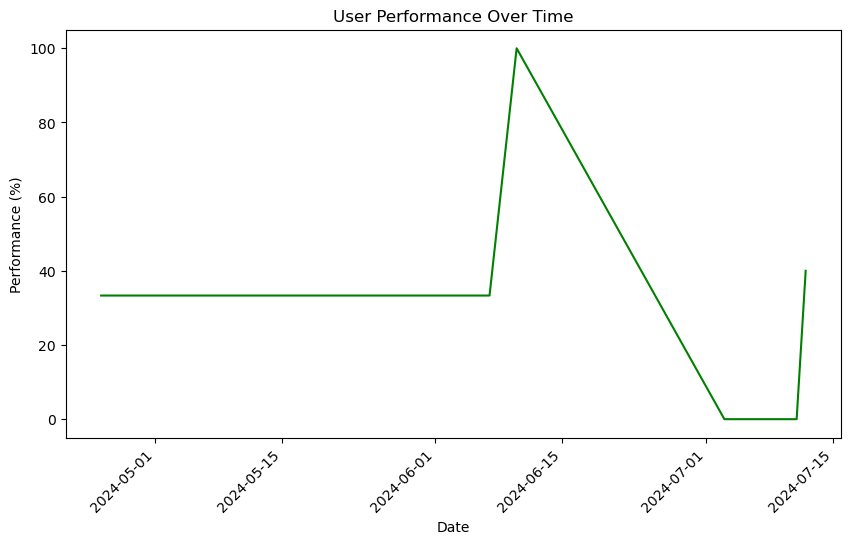

In [927]:
## Improvement Trends (if quiz_date is available)
if 'quiz_date' in df.columns:
    df['quiz_date'] = pd.to_datetime(df['quiz_date'])  # Ensure it's in datetime format
    performance_time_trend = df.groupby('quiz_date')['is_correct'].mean() * 100
    
    # Plotting the trend over time
    performance_time_trend.plot(kind='line', figsize=(10, 6), color='green')
    plt.title('User Performance Over Time')
    plt.xlabel('Date')
    plt.ylabel('Performance (%)')
    plt.xticks(rotation=45)
    plt.show()

In [931]:
import pandas as pd

# Assuming df contains columns: 'quiz.topic', 'is_correct', and 'difficulty_level'

# Step 1: Calculate overall performance (average)
overall_performance = df['is_correct'].mean() * 100  # Overall performance as percentage
print(f"Overall Performance: {overall_performance}%")

# Step 2: Calculate performance by topic
performance_by_topic = df.groupby('quiz.topic')['is_correct'].mean() * 100
print("\nPerformance by Topic (in %):")
print(performance_by_topic)

# Step 3: Identify weak areas (topics below average)
weak_areas = performance_by_topic[performance_by_topic < overall_performance]
print("\nWeak Areas (where performance is lower than average):")
print(weak_areas)

# Step 4: Recommendations for improvement

# Suggesting topics to focus on
recommended_topics = weak_areas.index.tolist()
print("\nSuggested Topics to Focus On:")
for topic in recommended_topics:
    print(f"- {topic}")

# Step 5: Difficulty level recommendation (if difficulty_level is available)
recommended_difficulty = None  # Initialize variable

if 'difficulty_level' in df.columns:
    performance_by_difficulty = df.groupby('difficulty_level')['is_correct'].mean() * 100
    print("\nPerformance by Difficulty Level (in %):")
    print(performance_by_difficulty)
    
    # Suggest an easier difficulty level if performance is poor
    recommended_difficulty = performance_by_difficulty.idxmin()  # Suggesting the easiest level
    print(f"\nSuggested Difficulty Level to Start With: {recommended_difficulty}")
else:
    print("\nNo difficulty level data available.")

# Step 6: Study Plan
study_plan = """
Study Plan:
1. Focus on the following topics where you need improvement:
    - {topics}

2. Start practicing questions at the {difficulty} difficulty level to build confidence.

3. Gradually increase the difficulty level after mastering the basics.

4. Track progress regularly by checking performance on each topic.

5. Consider practicing different question types (e.g., multiple choice, short answer) to improve speed and accuracy.
""".format(topics=", ".join(recommended_topics), difficulty=recommended_difficulty if recommended_difficulty else "easy")

print(study_plan)


Overall Performance: 40.0%

Performance by Topic (in %):
quiz.topic
Body Fluids And Circulation                 50.000000
Human Health And Disease                   100.000000
Human Reproduction                           0.000000
Microbes In Human Welfare                  100.000000
Principles Of Inheritance And Variation      0.000000
Reproductive Health                         33.333333
Respiration And Gas Exchange                 0.000000
Structural Organisation In Animals           0.000000
Name: is_correct, dtype: float64

Weak Areas (where performance is lower than average):
quiz.topic
Human Reproduction                          0.000000
Principles Of Inheritance And Variation     0.000000
Reproductive Health                        33.333333
Respiration And Gas Exchange                0.000000
Structural Organisation In Animals          0.000000
Name: is_correct, dtype: float64

Suggested Topics to Focus On:
- Human Reproduction
- Principles Of Inheritance And Variation
- Reprodu

In [1077]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load data from the URLs
url1 = "https://www.jsonkeeper.com/b/LLQT"
url2 = "https://api.jsonserve.com/rJvd7g"
url3 = "https://api.jsonserve.com/XgAgFJ"

# Function to load data from a URL
def load_data(url):
    response = requests.get(url)
    data = response.json()
    if isinstance(data, list):
        return pd.DataFrame(data)
    elif isinstance(data, dict):
        return pd.DataFrame([data])
    else:
        raise ValueError("Data format not recognized.")

# Fetch the data
data1 = load_data(url1)
data2 = load_data(url2)
data3 = load_data(url3)

# Combine the data into one DataFrame
data = pd.concat([data1, data2, data3], ignore_index=True)

# Select relevant features
features = ['score', 'accuracy']
target = 'rank_text'  # 'rank_text' is the column containing the rank, adjust if needed

# Clean 'score' and 'accuracy' columns (remove non-numeric characters)
for feature in features:
    data[feature] = data[feature].replace({'%': '', ',': ''}, regex=True)
    data[feature] = pd.to_numeric(data[feature], errors='coerce')  # Convert to numeric

# Extract numeric part from 'rank_text'
data[target] = data[target].str.extract(r'(\d+)')
data[target] = pd.to_numeric(data[target], errors='coerce')  # Convert to numeric

# Drop rows with missing values in relevant columns
data = data[features + [target]].dropna()

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)

# Feature importance
feature_importances = model.feature_importances_

# Clean Output
print("Model Evaluation Results:")
print(f"Mean Absolute Error: {mae:.2f}\n")

print("Feature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature.capitalize()}: {importance:.4f}")

# Predicting for new data (Example)
new_data = pd.DataFrame({'score': [80], 'accuracy': [95]})
predicted_rank = model.predict(new_data)
print(f"\nPredicted NEET Rank for score 80 and accuracy 95: {predicted_rank[0]:.2f}")





Model Evaluation Results:
Mean Absolute Error: 2132.50

Feature Importances:
Score: 0.6706
Accuracy: 0.3294

Predicted NEET Rank for score 80 and accuracy 95: 3517.14
